# 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。


1. 何を学習し、何を予測するのか
2. どのようなファイルを作りKaggleに提出するか
3. 提出されたものはどういった指標値で評価されるのか

1. 何を学習し、何を予測するのか<br>
→破産を予想するためのデータ（年齢、年収からローン情報等）を学習し、信用情報を予測する<br>
<br>
2. どのようなファイルを作りKaggleに提出するか<br>
→idとアルゴリズムで推定した0~1の情報<br> 
<br>
3. 提出されたものはどういった指標値で評価されるのか<br>
→ROC曲線

# 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。


検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。



### 結構長くなるので、学習と検証は↓の方になりますがご了承ください

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
import warnings

dir_path = "/Users/yuki.tatsuoka/Downloads/home-credit-default-risk (1)/"

app_train = pd.read_csv(dir_path + "application_train.csv")
app_test = pd.read_csv(dir_path + "application_test.csv")

pd.set_option("display.max_rows", 300)

In [2]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# EDAに必要な関数の読み込み↓
def plot_nan_percent(df_nan, title_name, tight_layout = True, figsize = (20,8), grid = False, rotation = 90):
    
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values
    
    Inputs:
        df_nan: 
            DataFrame of NaN percentages
        title_name: 
            Name of table to be displayed in title of plot
        tight_layout: bool, default = True
            Whether to keep tight layout or not
        figsize: tuple, default = (20,8)
            Figure size of plot    
        grid: bool, default = False
            Whether to draw gridlines to plot or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels

    '''
    
    #checking if there is any column with NaNs or not.
    if df_nan.percent.sum() != 0:
        print(f"Number of columns having NaN values: {df_nan[df_nan['percent'] != 0].shape[0]} columns")
        
        #plotting the Bar-Plot for NaN percentages (only for columns with Non-Zero percentage of NaN values)
        plt.figure(figsize = figsize, tight_layout = tight_layout)
        sns.barplot(x= 'column', y = 'percent', data = df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation = rotation)
        plt.xlabel('Column Name')
        plt.ylabel('Percentage of NaN values')
        plt.title(f'Percentage of NaN values in {title_name}')
        if grid:
            plt.grid()
        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")

In [6]:
def nan_df_create(data):
    
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe
    
    Inputs:
        data: 
            DataFrame
    
    Returns:
        DataFrame of NaN percentages
    '''
    
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})
    
    #sorting the dataframe by decreasing order of percentage of NaN values
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    
    return df

In [7]:
def load_all_tables(directory_path = '', verbose = True):
    
    '''
    Function to load all the tables required
    
    Input:
        directory_path: str, default = ''
            Path of directory in which tables are stored in
        verbose: bool, default = True
            Whether to keep verbosity or not
        
    '''
    
    if verbose:
        print("Loading all the tables...")
        start = datetime.now()
    
    #making all the variables global to be used anywhere in the notebook
    global application_train, application_test, bureau, bureau_balance, cc_balance, installments_payments, POS_CASH_balance, previous_application
    
    application_train = pd.read_csv(directory_path + 'application_train.csv')
    if verbose:
        print("Loaded 1 table.")
       
    application_test = pd.read_csv(directory_path + 'application_test.csv')
    if verbose:
        print("Loaded 2 tables.")

    bureau = pd.read_csv(directory_path + 'bureau.csv')
    if verbose:
        print("Loaded 3 tables.")

    bureau_balance = pd.read_csv(directory_path + 'bureau_balance.csv')
    if verbose:
        print("Loaded 4 tables.")

    cc_balance = pd.read_csv(directory_path + 'credit_card_balance.csv')
    if verbose:
        print("Loaded 5 tables.")

    installments_payments = pd.read_csv(directory_path + 'installments_payments.csv')
    if verbose:
        print("Loaded 6 tables.")

    POS_CASH_balance = pd.read_csv(directory_path + 'POS_CASH_balance.csv')
    if verbose:
        print("Loaded 7 tables.")

    previous_application = pd.read_csv(directory_path + 'previous_application.csv')
    if verbose:
        print("Loaded 8 tables.")
        print("Done.")
        print(f'Time Taken to load 8 tables = {datetime.now() - start}')

In [8]:
def print_unique_categories(data, column_name, show_counts = False):
    
    '''
    Function to print the basic stats such as unique categories and their counts for categorical variables
    
        Inputs:
        data: DataFrame
            The DataFrame from which to print statistics
        column_name: str
            Column's name whose stats are to be printed
        show_counts: bool, default = False
            Whether to show counts of each category or not

    '''
    
    print('-'*100)
    print(f"The unique categories of '{column_name}' are:\n{data[column_name].unique()}")
    print('-'*100)
    
    if show_counts:
        print(f"Counts of each category are:\n{data[column_name].value_counts()}")
        print('-'*100)

In [9]:
def plot_categorical_variables_bar(data, column_name, figsize = (18,6), percentage_display = True, plot_defaulter = True, rotation = 0, horizontal_adjust = 0, fontsize_percent = 'xx-small'):
    
    '''
    Function to plot Categorical Variables Bar Plots
    
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
        
    '''
    
    print(f"Total Number of unique categories of {column_name} = {len(data[column_name].unique())}")
    
    plt.figure(figsize = figsize, tight_layout = False)
    sns.set(style = 'whitegrid', font_scale = 1.2)
    
    #plotting overall distribution of category
    plt.subplot(1,2,1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending = False)
    ax = sns.barplot(x = data_to_plot.index, y = data_to_plot, palette = 'Set1')
    
    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(p.get_x() + horizontal_adjust, p.get_height() + 0.005 * total_datapoints, '{:1.02f}%'.format(p.get_height() * 100 / total_datapoints), fontsize = fontsize_percent)
        
    plt.xlabel(column_name, labelpad = 10)
    plt.title(f'Distribution of {column_name}', pad = 20)
    plt.xticks(rotation = rotation)
    plt.ylabel('Counts')
    
    #plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts() * 100 / data[column_name].value_counts()).dropna().sort_values(ascending = False)

        plt.subplot(1,2,2)
        sns.barplot(x = percentage_defaulter_per_category.index, y = percentage_defaulter_per_category, palette = 'Set2')
        plt.ylabel('Percentage of Defaulter per category')
        plt.xlabel(column_name, labelpad = 10)
        plt.xticks(rotation = rotation)
        plt.title(f'Percentage of Defaulters for each category of {column_name}', pad = 20)
    plt.show()

Number of columns having NaN values: 64 columns


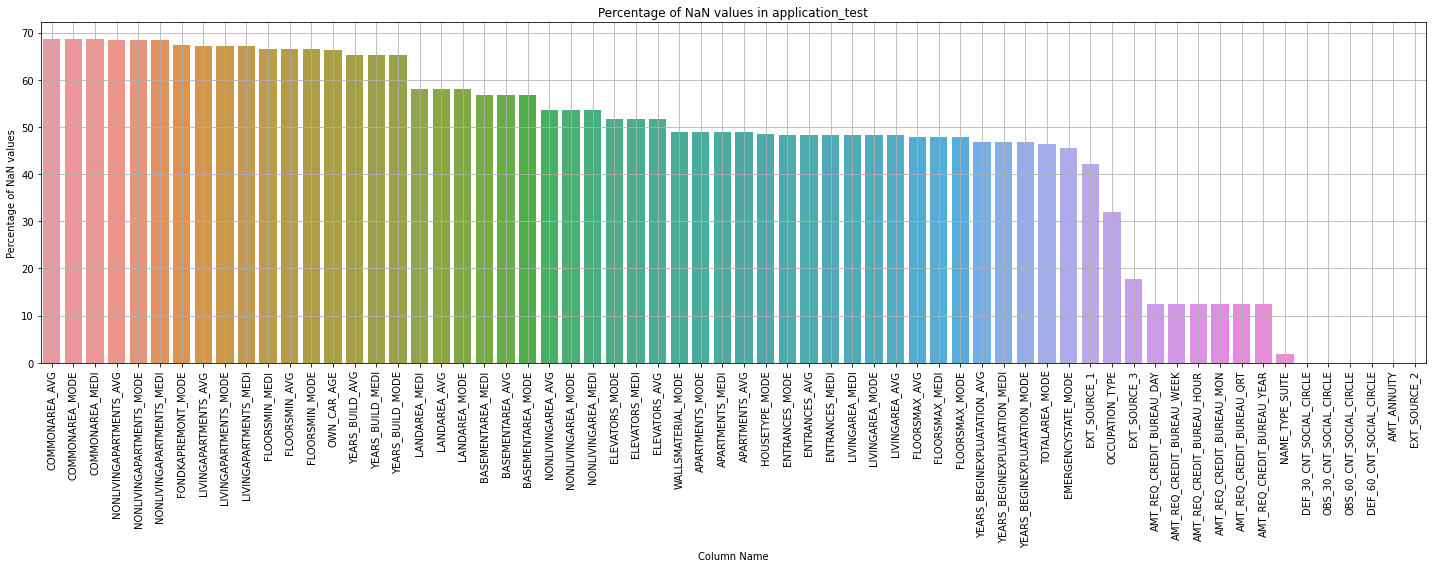

In [10]:
plot_nan_percent(nan_df_create(app_test), 'application_test', grid = True)

Number of columns having NaN values: 67 columns


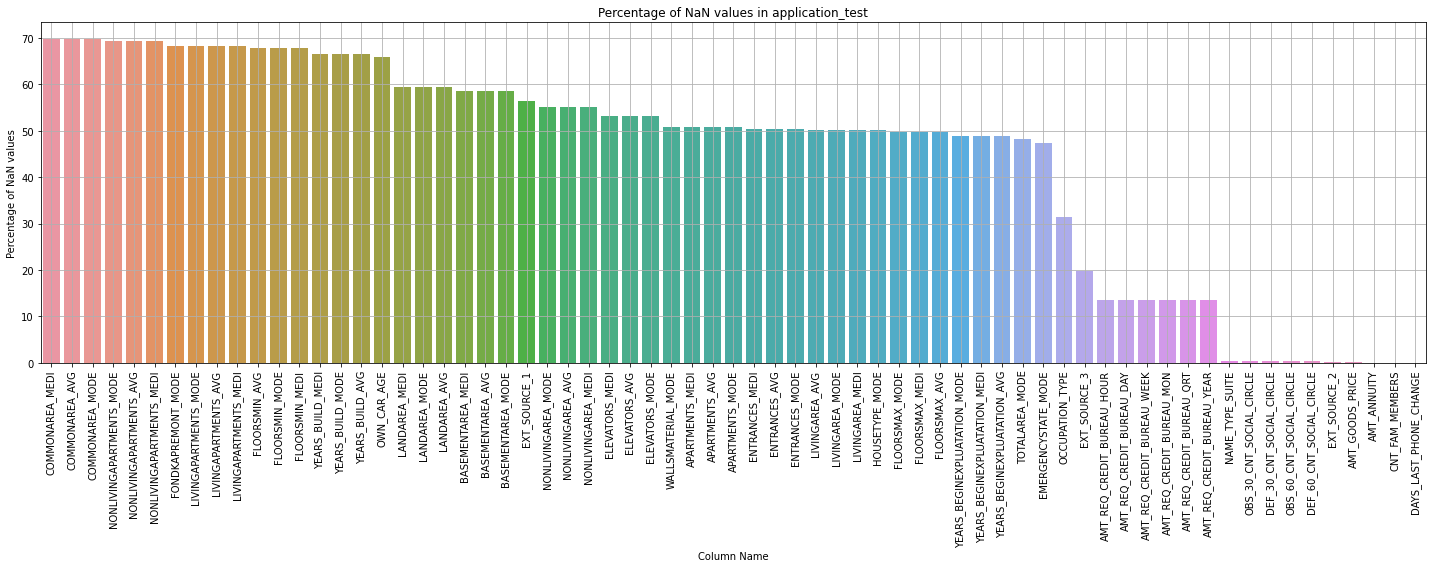

In [11]:
plot_nan_percent(nan_df_create(app_train), 'application_test', grid = True)

In [12]:
# 検討中
# 欠損値を削除するより、埋める事の参考程度？

----------------------------------------------------------------------------------------------------
The unique categories of 'NAME_EDUCATION_TYPE' are:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
----------------------------------------------------------------------------------------------------
Counts of each category are:
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Total Number of unique categories of NAME_EDUCATION_TYPE = 5


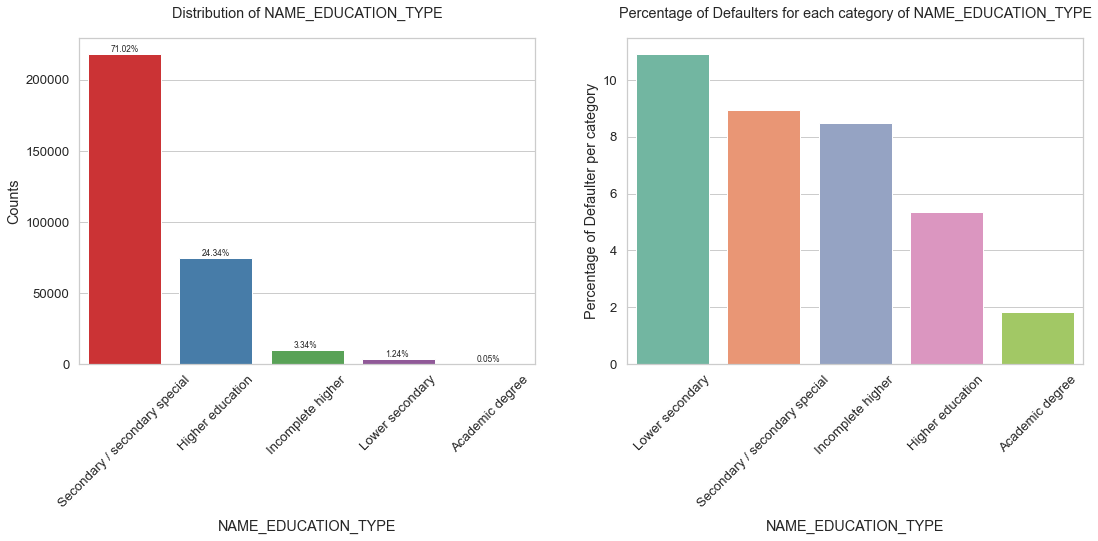

----------------------------------------------------------------------------------------------------


In [13]:
#let us first see the unique categories of 'NAME_EDUCATION_TYPE'
print_unique_categories(app_train, 'NAME_EDUCATION_TYPE', show_counts = True)

#plotting the Bar Plot for the Column
plot_categorical_variables_bar(app_train, column_name = 'NAME_EDUCATION_TYPE', rotation = 45, horizontal_adjust = 0.25)
print('-'*100)

----------------------------------------------------------------------------------------------------
The unique categories of 'OCCUPATION_TYPE' are:
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
----------------------------------------------------------------------------------------------------
Total Number of unique categories of OCCUPATION_TYPE = 19


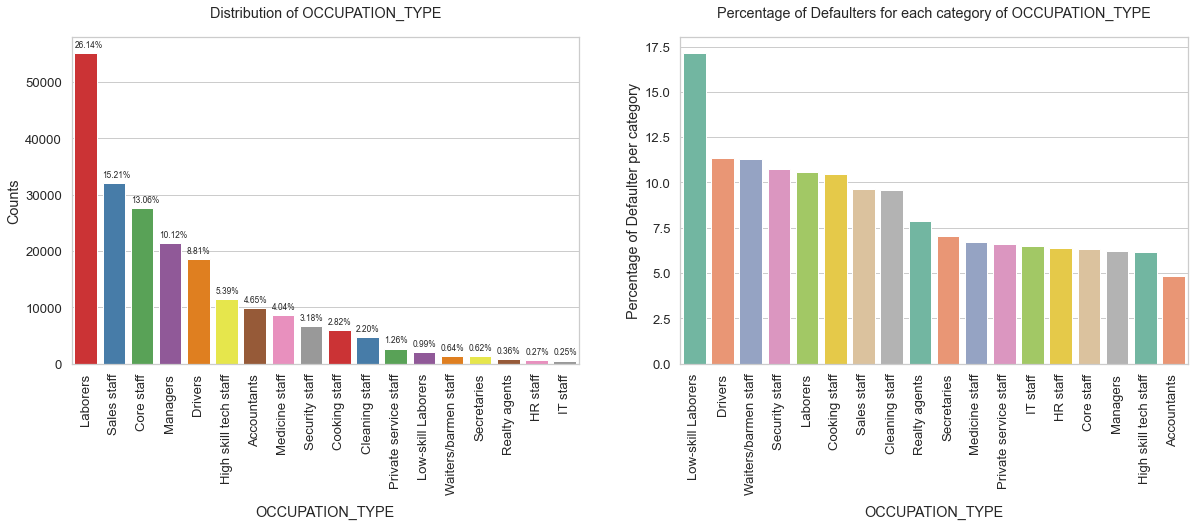

----------------------------------------------------------------------------------------------------


In [15]:
#let us first see the unique categories of 'OCCUPATION_TYPE'
print_unique_categories(app_train, 'OCCUPATION_TYPE')

#plotting the Bar Plot for the Column
plot_categorical_variables_bar(app_train, column_name = 'OCCUPATION_TYPE', figsize = (20,6), rotation = 90)
print('-'*100)

In [16]:
# 職業割合
# low-skill workerは割合が低いが破産
# waiters も割合が低いが破産率が高い

'''
結論
1.高学歴は破産しにくく、スキルが低い物は破産しやすい傾向がある。
  また、大学＞高校＞高校中退＞中卒で破産率が高い

2.low-skill workerは割合が低いが破産
  waiters も割合が低いが破産率が高い
'''

'\n結論\n1.高学歴は破産しにくく、スキルが低い物は破産しやすい傾向がある。\n  また、大学＞高校＞高校中退＞中卒で破産率が高い\n\n2.low-skill workerは割合が低いが破産\n  waiters も割合が低いが破産率が高い\n'

In [17]:
print("train shape{}, test shape{}".format(app_train.shape, app_test.shape))

train shape(307511, 122), test shape(48744, 121)


In [18]:
# TARGETを抽出して削除
y = app_train["TARGET"]
app_train.drop("TARGET",axis=1, inplace=True)

In [19]:
# train, testデータを結合する
X = pd.concat([app_train, app_test], axis=0).reset_index(drop=True)
print("結合後のshape{}".format(X.shape))

結合後のshape(356255, 121)


In [20]:
# 欠損値の確認
missing = X.isnull().sum()
missing = missing[missing > 0]
missing

AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   2203
OWN_CAR_AGE                     235241
OCCUPATION_TYPE                 111996
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    193910
EXT_SOURCE_2                       668
EXT_SOURCE_3                     69633
APARTMENTS_AVG                  179948
BASEMENTAREA_AVG                207584
YEARS_BEGINEXPLUATATION_AVG     172863
YEARS_BUILD_AVG                 236306
COMMONAREA_AVG                  248360
ELEVATORS_AVG                   189080
ENTRANCES_AVG                   178407
FLOORSMAX_AVG                   176341
FLOORSMIN_AVG                   241108
LANDAREA_AVG                    210844
LIVINGAPARTMENTS_AVG            242979
LIVINGAREA_AVG                  177902
NONLIVINGAPARTMENTS_AVG         246861
NONLIVINGAREA_AVG               195766
APARTMENTS_MODE                 179948
BASEMENTAREA_MODE               207584
YEARS_BEGINEXPLUATATION_M

In [21]:
# 数値型とオブジェクトを分断する
quantitve = [x for x in X.columns if X.dtypes[x] != object]
objective = [x for x in X.columns if X.dtypes[x] == object]

# 数値型には平均値、object型には中央値
for i in quantitve:
    X[i].fillna(X[i].mean(), inplace=True)

# modeのみSeriesとDataFrameでは挙動が異なるので, ilocで指定してndarray型に変換する
for i in objective:
    X[i].fillna(X[i].mode().iloc[0], inplace=True)

In [22]:
X[objective].isnull().sum().sum()

0

In [23]:
X[quantitve].isnull().sum().sum()

0

In [24]:
# object型をワンホットベクトルに変換する
X = pd.get_dummies(X)
X.shape

(356255, 245)

In [25]:
# trainデータとテストデータに分割する
new_app_train = X.iloc[:app_train.shape[0], :]
new_app_test = X.iloc[app_train.shape[0]:, :]
print("結合前のサイズ{}, {}".format(app_train.shape, app_test.shape))
print("結合後のサイズ{}, {}".format(new_app_train.shape, new_app_test.shape))
columns_name = new_app_train.columns.values

結合前のサイズ(307511, 121), (48744, 121)
結合後のサイズ(307511, 245), (48744, 245)


In [26]:
# trainデータを分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_app_train, y, random_state=42)

In [27]:
# LightGBMで学習してみる
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# JSONエラーが出たので追加
# https://www.kaggle.com/c/data-science-bowl-2019/discussion/122021
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# モデル選定 
model = lgb.LGBMClassifier(n_estimators=200)

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

# パラーメータの調整
params_algo = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric':'auc',
            }
# 学習と推定
model = lgb.train(params_algo, train, valid_sets=test)


[LightGBM] [Info] Number of positive: 18634, number of negative: 211999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11677
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080795 -> initscore=-2.431594
[LightGBM] [Info] Start training from score -2.431594
[1]	valid_0's auc: 0.707786
[2]	valid_0's auc: 0.712821
[3]	valid_0's auc: 0.7159
[4]	valid_0's auc: 0.719481
[5]	valid_0's auc: 0.721847
[6]	valid_0's auc: 0.723382
[7]	valid_0's auc: 0.726181
[8]	valid_0's auc: 0.727651
[9]	valid_0's auc: 0.728805
[10]	valid_0's auc: 0.730536
[11]	valid_0's auc: 0.731871
[12]	valid_0's auc: 0.732974
[13]	valid_0's auc: 0.734273
[14]	valid_0's auc: 0.735762
[15]	valid_0's auc: 0.736945
[16]	valid_

# 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。



In [28]:
# 予測する
pred = model.predict(new_app_test,num_iteration=model.best_iteration)
print(pred.shape)

# IDを抜き出し# predをdataFrameに入れる。
id_test = new_app_test.loc[:, "SK_ID_CURR"].reset_index(drop=True)
pred = pd.DataFrame(pred, columns=["TARGET"])

#結合と提出
submission = pd.concat([id_test, pred], axis=1).reset_index(drop=True)
submission.to_csv("/Users/yuki.tatsuoka/Downloads/home-credit-default-risk (1)/submission.csv", index=False)

(48744,)


# 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。


1. どの特徴量を使うか
2. どう前処理をするか

何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。


精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

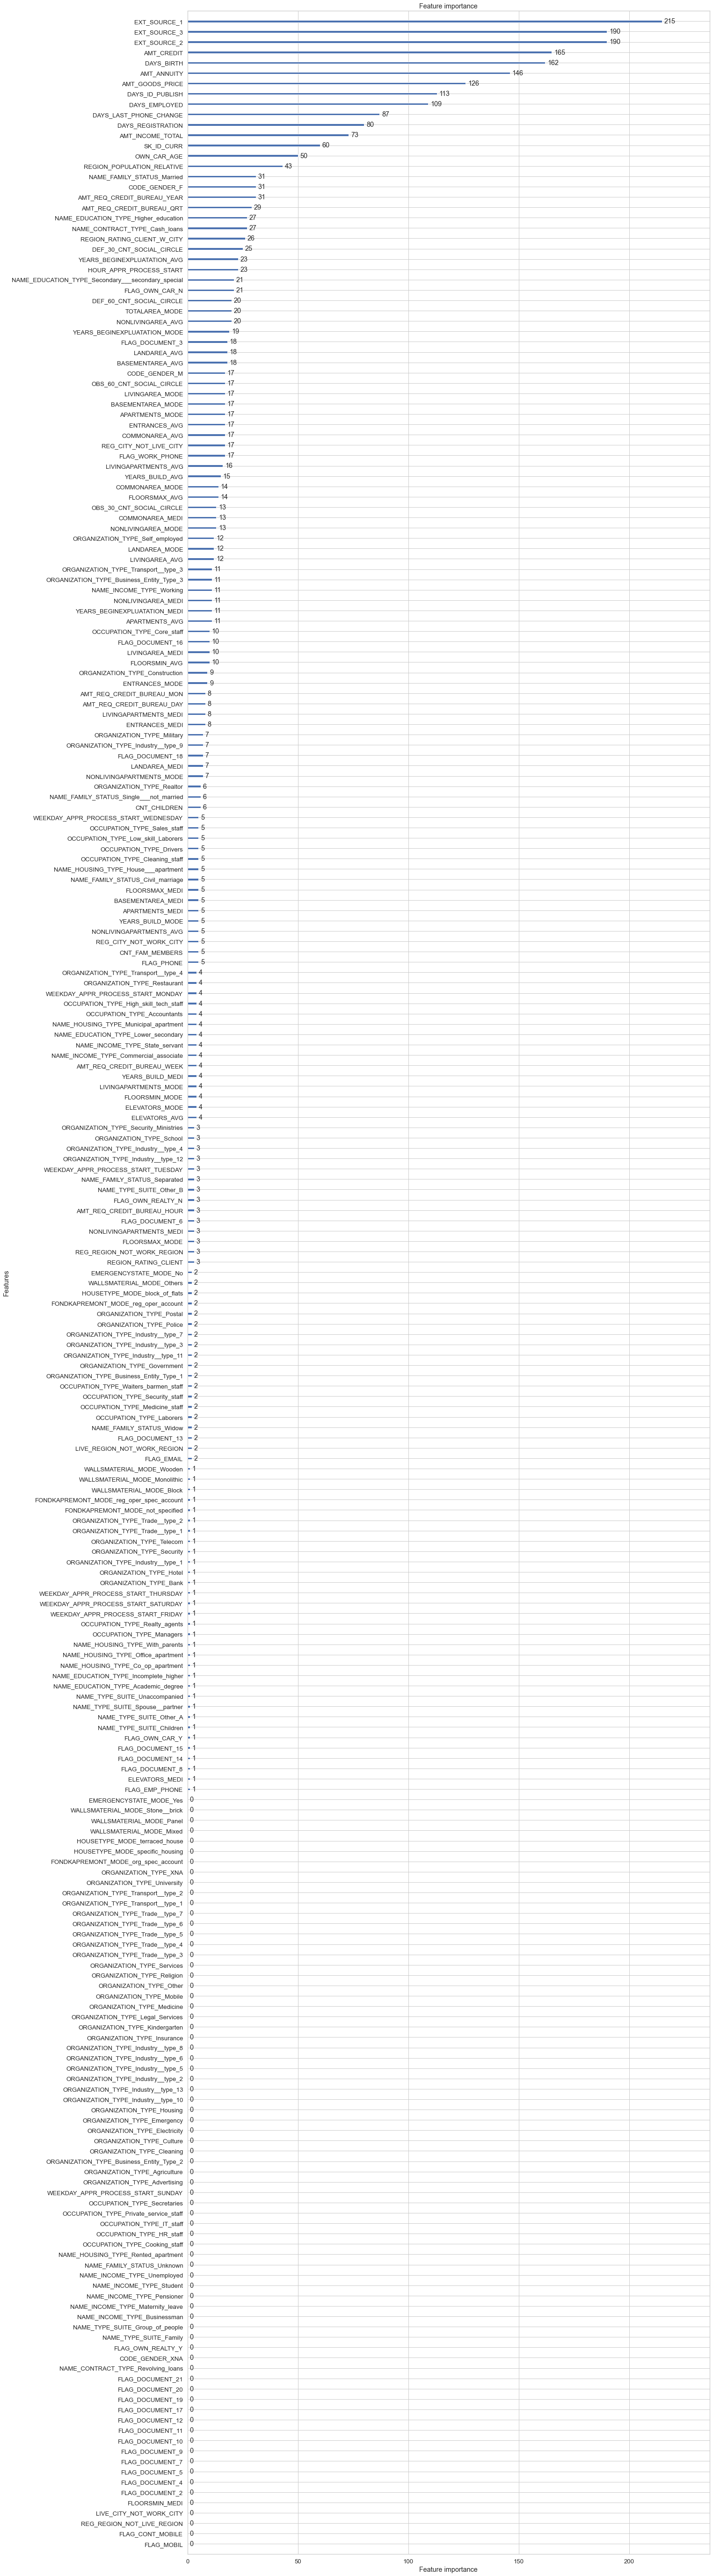

In [29]:
# パターン1 重要度を調査し、不必要な物を削除した上で学習と検証を行う。
importance_feature = lgb.plot_importance(model, figsize=(20,100), ignore_zero=False)
plt.show()

In [30]:
# ソートする
importance = pd.DataFrame(model.feature_importance(), index=X_test.columns, columns=['importance'])
importance_sorted = importance.sort_values(by='importance')
importance_sorted = importance_sorted.index[0:73]

# 不要な重要度を削除する
importance.drop(importance_sorted, inplace=True)
importance.shape


(172, 1)

In [31]:
 # 学習準備
X_train = X_train.drop(importance_sorted, axis=1)
X_test = X_test.drop(importance_sorted, axis=1)

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

In [32]:
# 学習と推定
model = lgb.train(params_algo, train, valid_sets=test)

[LightGBM] [Info] Number of positive: 18634, number of negative: 211999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11511
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 172
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080795 -> initscore=-2.431594
[LightGBM] [Info] Start training from score -2.431594
[1]	valid_0's auc: 0.707786
[2]	valid_0's auc: 0.712821
[3]	valid_0's auc: 0.7159
[4]	valid_0's auc: 0.719481
[5]	valid_0's auc: 0.721847
[6]	valid_0's auc: 0.723382
[7]	valid_0's auc: 0.726181
[8]	valid_0's auc: 0.727651
[9]	valid_0's auc: 0.728805
[10]	valid_0's auc: 0.730536
[11]	valid_0's auc: 0.731871
[12]	valid_0's auc: 0.732974
[13]	valid_0's auc: 0.734273
[14]	valid_0's auc: 0.735762
[15]	valid_0's auc: 0.736945
[16]	valid_

In [33]:
# パターン2　指標に変化がないので重要度を30以上に設定する
importance_sorted = importance.sort_values(by='importance')
importance_sorted = importance_sorted[0:153].index

 # 学習準備
X_train = X_train.drop(importance_sorted, axis=1)
X_test = X_test.drop(importance_sorted, axis=1)

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

In [34]:
# 学習と推定
model2 = lgb.train(params_algo, train, valid_sets=test)

[LightGBM] [Info] Number of positive: 18634, number of negative: 211999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3379
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080795 -> initscore=-2.431594
[LightGBM] [Info] Start training from score -2.431594
[1]	valid_0's auc: 0.71036
[2]	valid_0's auc: 0.71322
[3]	valid_0's auc: 0.71665
[4]	valid_0's auc: 0.718906
[5]	valid_0's auc: 0.721858
[6]	valid_0's auc: 0.723319
[7]	valid_0's auc: 0.724604
[8]	valid_0's auc: 0.725984
[9]	valid_0's auc: 0.727186
[10]	valid_0's auc: 0.728513
[11]	valid_0's auc: 0.729641
[12]	valid_0's auc: 0.730554
[13]	valid_0's auc: 0.731738
[14]	valid_0's auc: 0.732328
[15]	valid_0's auc: 0.733426
[16]	valid_0's

In [35]:
#　重要度が低い物を削除した場合、下方修正されるため特徴量を削除するのはよろしくない。

In [36]:
# パターン3 標準化する事によって影響がある確認する
# get_demmiesまで戻る必要がある。
from sklearn.preprocessing import StandardScaler

# ダウンロード
df_train = pd.read_csv(dir_path + "application_train.csv")
df_test = pd.read_csv(dir_path + "application_test.csv")
df_y = df_train["TARGET"]
df_train = df_train.drop("TARGET", axis=1)

# マージ
df = pd.concat([df_train, df_test])

# 欠損値を埋める
for i in quantitve:
    df[i].fillna(df[i].mean(), inplace=True)

for i in objective:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

df.isnull().sum().sum()

0

In [37]:
# numericalを標準化する
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df[quantitve])
df_scaler.shape

# categoricalにワンホット
df_one_hot = pd.get_dummies(df[objective]).reset_index(drop=True)
df_scaler.shape,df_one_hot.shape

((356255, 105), (356255, 140))

In [38]:
# マージ
df_scaler = pd.DataFrame(df_scaler, columns=quantitve).reset_index(drop=True)
df_scaler_merge = pd.concat([df_scaler, df_one_hot], axis=1)

In [39]:
new_train = df_scaler_merge.iloc[:df_train.shape[0], :]
new_test = df_scaler_merge.iloc[df_test.shape[0]:, :]
print("結合前のサイズ{}, {}".format(df_train.shape, df_test.shape))
print("結合後のサイズ{}, {}".format(new_train.shape, new_test.shape))

結合前のサイズ(307511, 121), (48744, 121)
結合後のサイズ(307511, 245), (307511, 245)


In [40]:
# lightGBMで詰まったので標準化とワンホットの両方が可能か検証
# 結論：可能
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(new_train, df_y, random_state=42)

model_LR = LogisticRegression().fit(X_train, y_train)
a = model_LR.predict(X_test)

roc_auc_score(a, y_test)

/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6790634489630796

In [41]:
# LightGBMで学習してみる
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(new_train, df_y, random_state=42)

# JSONエラーが出たので追加
# https://www.kaggle.com/c/data-science-bowl-2019/discussion/122021
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# モデル選定 
model = lgb.LGBMClassifier()

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

# パラーメータの調整
params_algo = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric':'auc',
            }
# 学習と推定
model = lgb.train(params_algo, train, valid_sets=test)


[LightGBM] [Info] Number of positive: 18634, number of negative: 211999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11641
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080795 -> initscore=-2.431594
[LightGBM] [Info] Start training from score -2.431594
[1]	valid_0's auc: 0.707768
[2]	valid_0's auc: 0.713204
[3]	valid_0's auc: 0.716668
[4]	valid_0's auc: 0.719293
[5]	valid_0's auc: 0.722024
[6]	valid_0's auc: 0.723337
[7]	valid_0's auc: 0.726437
[8]	valid_0's auc: 0.728645
[9]	valid_0's auc: 0.730149
[10]	valid_0's auc: 0.731417
[11]	valid_0's auc: 0.732589
[12]	valid_0's auc: 0.733666
[13]	valid_0's auc: 0.734702
[14]	valid_0's auc: 0.735613
[15]	valid_0's auc: 0.736875
[16]	vali

In [42]:
# 前：0.757983
# 今：0.757983
# get_dummiesは共通して行ったので違いは標準化のみだが、lightGBMでは標準化効果なし？？
# 少なからずこの検証では効果がないように見える

In [43]:
# パターン4 とりあえず新規で特徴量を作ってみる
model_importance = pd.DataFrame(model.feature_importance(), index=X_train.columns, columns=["score"])
model_importance = model_importance.sort_values("score", ascending=False)

In [44]:
model_importance[0:10]

,score
EXT_SOURCE_1,225
DAYS_BIRTH,192
EXT_SOURCE_3,186
EXT_SOURCE_2,185
AMT_CREDIT,170
AMT_ANNUITY,141
AMT_GOODS_PRICE,135
DAYS_ID_PUBLISH,115
DAYS_EMPLOYED,107
DAYS_LAST_PHONE_CHANGE,95


In [45]:
# 特徴量の作成（今回は上位3位の特徴量の平均、分散、標準偏差を入れてみる）
#df_scaler_merge['EXT_SOURCE_1_mean'] = df_scaler_merge['EXT_SOURCE_1']

In [46]:
# パターン4 異常値を検出してみる
from sklearn.ensemble import IsolationForest

n_outliers = IsolationForest()
n_outliers.fit(new_train)

# 予測値をDataFrameに入れて異常値の数を探す
mv_outlier = pd.DataFrame(n_outliers.predict(new_train))

In [47]:
# 外れ値の数
mv_outlier.columns = ['outlier']
mv_outlier['outlier'].value_counts()

 1    304625
-1      2886
Name: outlier, dtype: int64

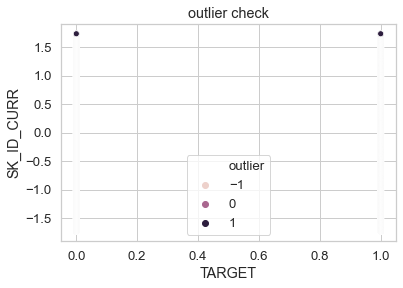

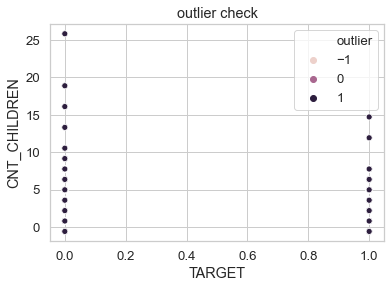

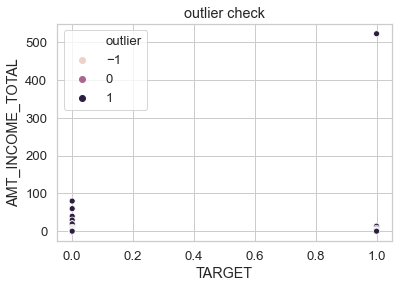

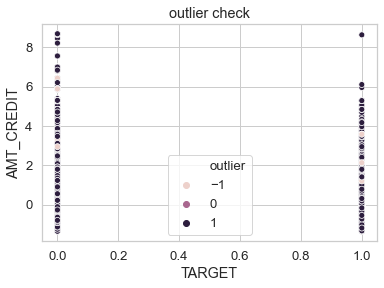

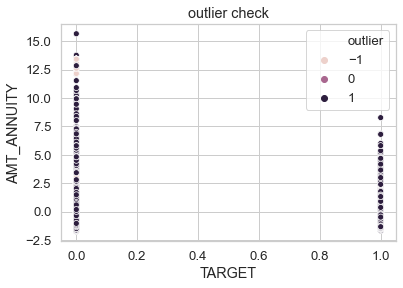

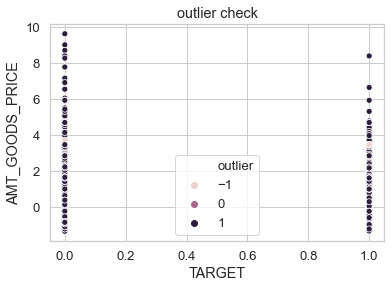

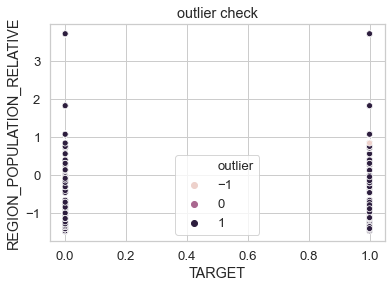

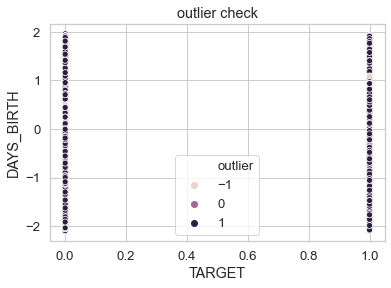

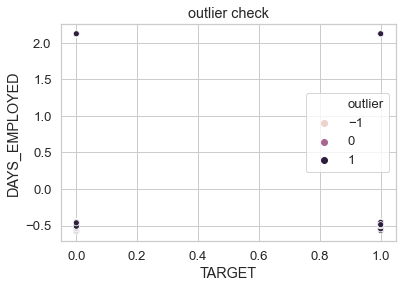

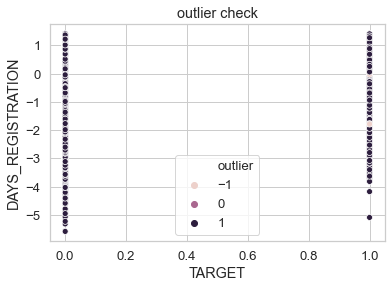

In [48]:
# trainデータとoutlierをマージ
df_outlier_check = pd.concat([new_train, df_y, mv_outlier], axis=1)

# scatterで処理の確認を実施するが、効果が薄いので数個確認して終了
import seaborn as sns

for i in df_outlier_check.columns[0:10]:
    plt.title("outlier check")
    plt.xlabel("TAGET")
    plt.ylabel("i")
    sns.scatterplot(df_outlier_check["TARGET"], 
                  df_outlier_check[i], 
                  hue=df_outlier_check["outlier"],)
    plt.show()


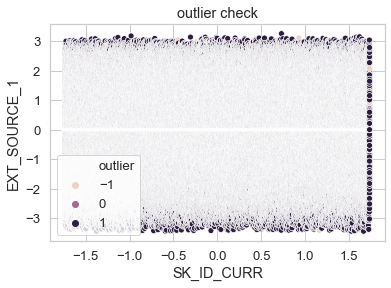

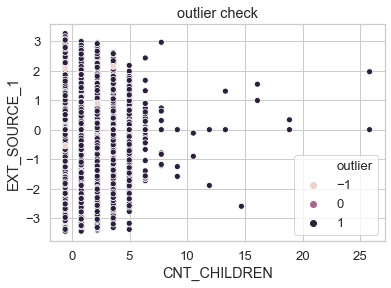

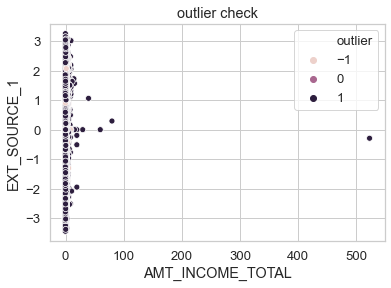

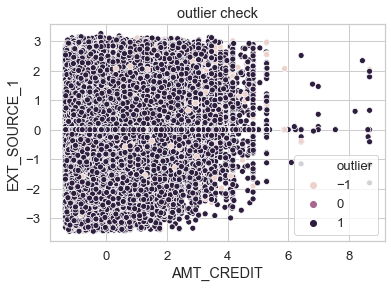

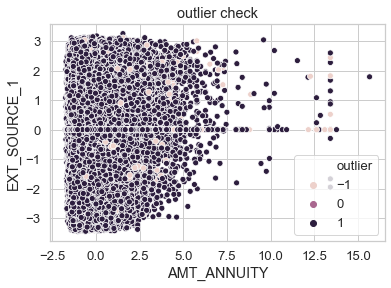

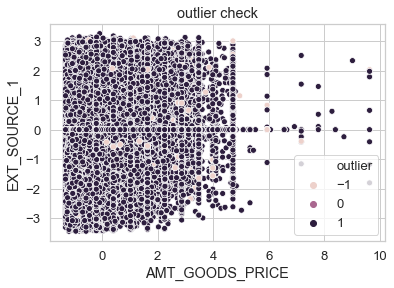

/Users/yuki.tatsuoka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


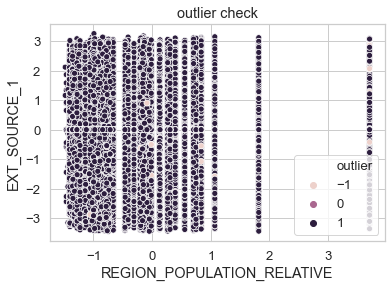

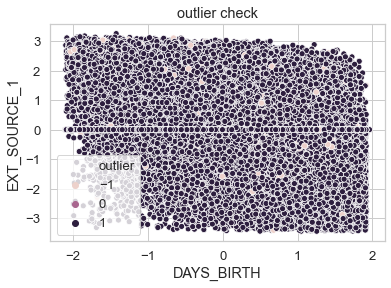

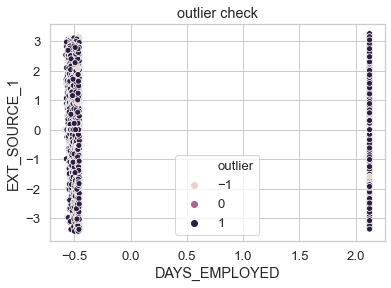

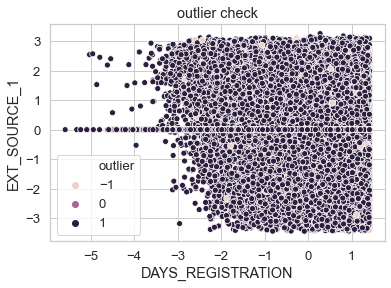

In [49]:

# TARGETをやめてみる。重要度の高いEXT_SOURCE_1をみる。
# 処理が重すぎるため途中終了
for i in df_outlier_check.columns[0:10]:
    plt.title("outlier check")
    plt.xlabel("TAGET")
    plt.ylabel("i")
    sns.scatterplot(df_outlier_check[i], 
                  df_outlier_check["EXT_SOURCE_1"], 
                  hue=df_outlier_check["outlier"],)
    plt.show()


In [50]:
# 回帰問題ならscatterで処理を目視してから処理ができそうだが
#数が数なので、インデックスを元に削除してみる
mv_outlier_index = mv_outlier[mv_outlier['outlier'] == -1].index.values
new_train =new_train.reset_index(drop=True) 

# 削除する
new_train2 = new_train.drop(mv_outlier_index)
df_y2 = y.drop(mv_outlier_index)


In [51]:
# lightGBMに入れる
# LightGBMで学習してみる
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(new_train2, df_y2, random_state=42)

# JSONエラーが出たので追加
# https://www.kaggle.com/c/data-science-bowl-2019/discussion/122021
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# モデル選定 
model = lgb.LGBMClassifier()

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

# パラーメータの調整
params_algo = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric':'auc',
            }

# 学習と推定
model = lgb.train(params_algo, train, valid_sets=test)


[LightGBM] [Info] Number of positive: 18536, number of negative: 209932
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11620
[LightGBM] [Info] Number of data points in the train set: 228468, number of used features: 235
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081132 -> initscore=-2.427069
[LightGBM] [Info] Start training from score -2.427069
[1]	valid_0's auc: 0.712167
[2]	valid_0's auc: 0.718986
[3]	valid_0's auc: 0.722627
[4]	valid_0's auc: 0.725523
[5]	valid_0's auc: 0.726981
[6]	valid_0's auc: 0.729759
[7]	valid_0's auc: 0.73159
[8]	valid_0's auc: 0.732867
[9]	valid_0's auc: 0.734411
[10]	valid_0's auc: 0.7359
[11]	valid_0's auc: 0.737592
[12]	valid_0's auc: 0.738437
[13]	valid_0's auc: 0.739242
[14]	valid_0's auc: 0.740489
[15]	valid_0's auc: 0.74166
[16]	valid_0's auc: 0.742959
[17]	valid_0's auc: 0.743912
[18]	valid_0's auc:

In [52]:
# 結論：スコアの上昇
# IsolationForestで出力した物をインデックスで削除するだけでも効果あり

In [82]:
# パターン5 欠損値の埋め方を平均値埋めではなく、０だとどちらがスコアが良いのか比較する

# ダウンロード
df_train = pd.read_csv(dir_path + "application_train.csv")
df_test = pd.read_csv(dir_path + "application_test.csv")
df_y = df_train["TARGET"]
df_train = df_train.drop("TARGET", axis=1)

# マージ
df = pd.concat([df_train, df_test])
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [83]:
df.fillna(0, inplace=True)

In [85]:
df.isnull().sum().sum()

0

In [87]:
df = pd.get_dummies(df)
df.shape

(356255, 251)

In [92]:
#訓練データとテストデータを元に戻す　
new_train = df.iloc[:df_train.shape[0], :]
new_test = df.iloc[df_test.shape[0]:, :]
print("結合前のサイズ{}, {}".format(df_train.shape, df_test.shape))
print("結合後のサイズ{}, {}".format(new_train.shape, new_test.shape))

X_train, X_test, y_train, y_test = train_test_split(new_train, df_y, random_state=42)

結合前のサイズ(307511, 121), (48744, 121)
結合後のサイズ(307511, 251), (307511, 251)


In [93]:
# LightGBMで実験
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# JSONエラーが出たので追加
# https://www.kaggle.com/c/data-science-bowl-2019/discussion/122021
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# モデル選定 
model = lgb.LGBMClassifier(n_estimators=200)

# 学習データの用意
train = lgb.Dataset(X_train, y_train) 
test = lgb.Dataset(X_test, y_test, reference=train)

# パラーメータの調整
params_algo = {
                'task': 'train',
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric':'auc',
            }
# 学習と推定
model = lgb.train(params_algo, train, valid_sets=test)


[LightGBM] [Info] Number of positive: 18634, number of negative: 211999
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11723
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 239
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080795 -> initscore=-2.431594
[LightGBM] [Info] Start training from score -2.431594
[1]	valid_0's auc: 0.698898
[2]	valid_0's auc: 0.709897
[3]	valid_0's auc: 0.712113
[4]	valid_0's auc: 0.716848
[5]	valid_0's auc: 0.720862
[6]	valid_0's auc: 0.72368
[7]	valid_0's auc: 0.724862
[8]	valid_0's auc: 0.726224
[9]	valid_0's auc: 0.727613
[10]	valid_0's auc: 0.729362
[11]	valid_0's auc: 0.730466
[12]	valid_0's auc: 0.731532
[13]	valid_0's auc: 0.732946
[14]	valid_0's auc: 0.734191
[15]	valid_0's auc: 0.735273
[16]	valid

In [ ]:
# 結果
# 前：0.756465
# 今：0.756519

# 結果として、平均や中央で埋めるより少し結果が良くなった。
# 尖度を上げるよりも、０埋めが良いのは元のグラフの形が維持された可能性がある

# 5パターン終了したので、現段階ではここまでとする。